<a href="https://colab.research.google.com/github/sam2005-max/mr_clean/blob/main/my_mr_clean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
import random


In [2]:
def get_content(article_name):
    url = "https://en.wikipedia.org/w/api.php"
    params = {
        "action": "query",
        "prop": "extracts",
        "titles": article_name,
        "format": "json"
  
    }
  
    data = requests.get(url, params=params)
    return data.json()

data = get_content("Ozone_layer")
#print(data)

In [3]:
def merge_contents(data):
    required_data = list(data["query"]["pages"].values())[0]["extract"]
    soup = BeautifulSoup(required_data, "html.parser").text
    return soup


merged_content = merge_contents(data)
#print(merged_content)
                                    

In [4]:
def tokenize(content):
    splitter = re.split("\. |, |\.|\n| |-|\'", content)
    words = []
    for i in splitter:
        if i.isalpha():
            words.append(i)
    return words

stop_words = ["the", "of", "and", "in", "to", "is", "a", "by"]
collection = tokenize(merged_content)
#print(collection)

In [5]:
def lower_collection(collection):
    lower_words = [word.lower() for word in collection]
    return lower_words

collection = lower_collection(collection)
#print(collection)    

In [6]:
def count_frequency(collection):
    frequency = {}
    for word in collection:
        if word in frequency:
            frequency[word] += 1
        else:
            frequency[word] = 1
    return frequency

In [7]:
def print_most_frequent(frequencies, n):
    for i in range(n):
        word, freq = max(frequencies.items(), key=lambda x: x[1])
        print(f"{word}: {freq}")
        del frequencies[word]

frequencies = count_frequency(collection)
print_most_frequent(frequencies, 10)

the: 207
of: 106
ozone: 90
and: 80
in: 71
to: 63
is: 39
a: 33
layer: 26
by: 25


In [8]:
def remove_stop_words(words, stop_words):
    stop_words = set(stop_words)
    return (word for word in words if word not in stop_words)


collection = tokenize(merged_content)
collection = lower_collection(collection)

filtered_collection = remove_stop_words(collection, stop_words)
print(list(filtered_collection))

['ozone', 'layer', 'or', 'ozone', 'shield', 'region', 'earth', 's', 'stratosphere', 'that', 'absorbs', 'most', 'sun', 's', 'ultraviolet', 'radiation', 'it', 'contains', 'high', 'concentration', 'ozone', 'relation', 'other', 'parts', 'atmosphere', 'although', 'still', 'small', 'relation', 'other', 'gases', 'stratosphere', 'ozone', 'layer', 'contains', 'less', 'than', 'parts', 'per', 'million', 'ozone', 'while', 'average', 'ozone', 'concentration', 'earth', 's', 'atmosphere', 'as', 'whole', 'about', 'parts', 'per', 'million', 'ozone', 'layer', 'mainly', 'found', 'lower', 'portion', 'stratosphere', 'from', 'approximately', 'kilometers', 'above', 'earth', 'although', 'its', 'thickness', 'varies', 'seasonally', 'geographically', 'ozone', 'layer', 'was', 'discovered', 'french', 'physicists', 'charles', 'fabry', 'henri', 'buisson', 'measurements', 'sun', 'showed', 'that', 'radiation', 'sent', 'out', 'from', 'its', 'surface', 'reaching', 'ground', 'on', 'earth', 'usually', 'consistent', 'with'

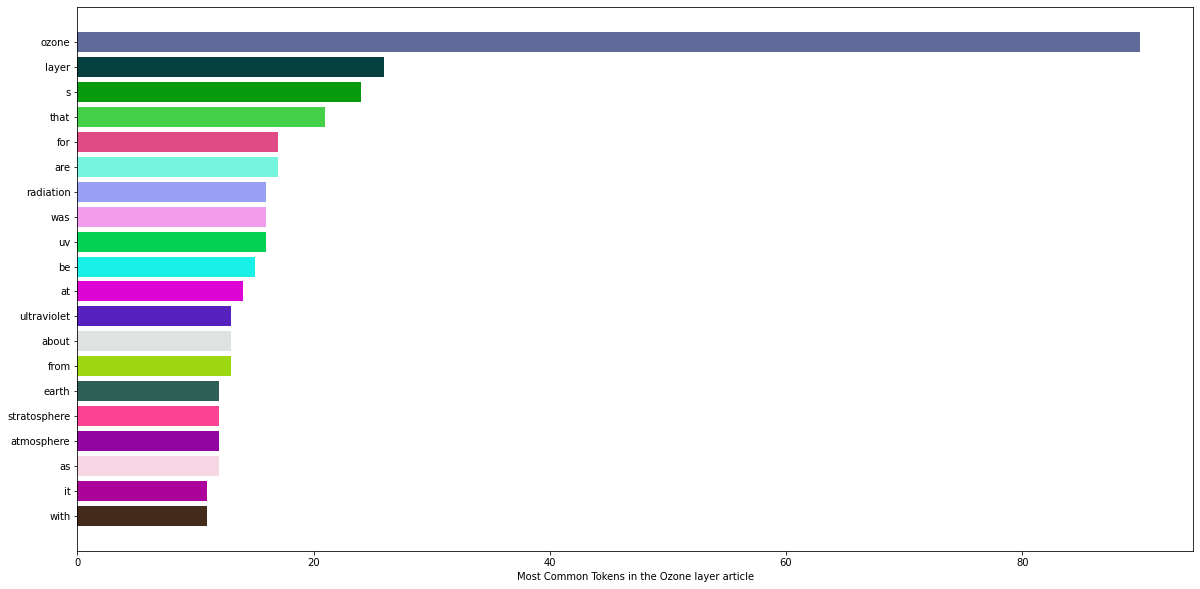

In [9]:
def visualizing(frequencies, n):
    words = []
    counts = []
    colors = []
    for i in range(n):
        word, freq= max(frequencies.items(), key=lambda x: x[1])
        words.append(word)
        counts.append(freq)
        colors.append('#%06X' % random.randint(0, 0xFFFFFF))
        del frequencies[word]
    
    plt.figure(figsize=(20, 10))
    plt.xlabel("Most Common Tokens in the Ozone layer article")
    plt.barh(words[::-1], counts[::-1], color=colors[::-1])
    plt.show()

filtered_collection = list(remove_stop_words(collection, stop_words))
if len(filtered_collection) == 0:
    print("filtered_collection is empty")
else:
    frequencies_filtered = count_frequency(filtered_collection)
    visualizing(frequencies_filtered,  20)    
#frequencies = count_frequency(collection)
#visualizing(frequencies, 20)